<a href="https://colab.research.google.com/github/sergeGITH/TS/blob/main/TMDL_group_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import kagglehub

# download latest version
path = kagglehub.dataset_download("joebeachcapital/loan-default")

print("Path to dataset files:", path)

100%|██████████| 2.80M/2.80M [00:00<00:00, 70.9MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/joebeachcapital/loan-default/versions/1


In [2]:
import os

# list files in the dataset folder
dataset_folder = "/root/.cache/kagglehub/datasets/joebeachcapital/loan-default/versions/1/"
files = os.listdir(dataset_folder)

print("Files in dataset folder:", files)

Files in dataset folder: ['Anonymize_Loan_Default_data.csv']


In [3]:
import pandas as pd

file_path = os.path.join(dataset_folder, 'Anonymize_Loan_Default_data.csv')

# load the dataset into a df
df = pd.read_csv(file_path, encoding='ISO-8859-1')

# display the first few rows to confirm its loaded correctly
print(df.head())

   Unnamed: 0      id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
0           2       2          2        0.0          0.0              0.0   
1           3  545583     703644     2500.0       2500.0           2500.0   
2           4  532101     687836     5000.0       5000.0           5000.0   
3           5  877788    1092507     7000.0       7000.0           7000.0   
4           6  875406    1089981     2000.0       2000.0           2000.0   

        term  int_rate  installment emp_length  ... total_acc  total_pymnt  \
0  36 months      0.00         0.00   < 1 year  ...       1.0     0.000000   
1  36 months     13.98        85.42    4 years  ...      10.0  3075.291779   
2  36 months     15.95       175.67    4 years  ...      15.0  2948.760000   
3  36 months      9.91       225.58  10+ years  ...      20.0  8082.391880   
4  36 months      5.42        60.32  10+ years  ...      15.0  2161.663244   

  total_pymnt_inv total_rec_prncp total_rec_int last_pymnt_d last_py

In [4]:
# get descriptive statistics
print(df.describe())




verifications = set(df["verification_status"])
print(verifications)
not_verified = df[df["verification_status"] == "Not Verified"]
print(len(not_verified))

print(len(df[df["repay_fail"] == 1]))
print(df.columns.tolist())



         Unnamed: 0            id     member_id     loan_amnt   funded_amnt  \
count  38480.000000  3.848000e+04  3.848000e+04  38479.000000  38479.000000   
mean   19240.500000  6.649979e+05  8.261899e+05  11094.727644  10831.856337   
std    11108.363516  2.192322e+05  2.793531e+05   7405.416042   7146.853682   
min        1.000000  1.000000e+00  1.000000e+00      0.000000      0.000000   
25%     9620.750000  4.983645e+05  6.384620e+05   5200.000000   5100.000000   
50%    19240.500000  6.443195e+05  8.242545e+05   9750.000000   9600.000000   
75%    28860.250000  8.265608e+05  1.034706e+06  15000.000000  15000.000000   
max    38480.000000  1.077430e+06  1.314167e+06  35000.000000  35000.000000   

       funded_amnt_inv     int_rate   installment    annual_inc           dti  \
count     38479.000000  38480.00000  38479.000000  3.847800e+04  38480.000000   
mean      10150.141518     12.16430    323.163255  6.899531e+04     13.378119   
std        7128.026828      3.73744    209.08

In [5]:
# define the columns to keep
columns_to_keep = [
    "funded_amnt", "term", "int_rate", "installment", "emp_length",
    "home_ownership", "annual_inc", "verification_status", "loan_status",
    "dti", "delinq_2yrs", "inq_last_6mths",
    "pub_rec", "total_acc", "repay_fail"
]

# keep only the selected columns
df = df[columns_to_keep]

# display the filtered DataFrame
print(df.head())

# optionally, save the new DataFrame to a CSV file
df.to_csv("filtered_data.csv", index=False)

   funded_amnt       term  int_rate  installment emp_length home_ownership  \
0          0.0  36 months      0.00         0.00   < 1 year           RENT   
1       2500.0  36 months     13.98        85.42    4 years           RENT   
2       5000.0  36 months     15.95       175.67    4 years           RENT   
3       7000.0  36 months      9.91       225.58  10+ years       MORTGAGE   
4       2000.0  36 months      5.42        60.32  10+ years           RENT   

   annual_inc verification_status  \
0         0.0        Not Verified   
1     20004.0        Not Verified   
2     59000.0        Not Verified   
3     53796.0        Not Verified   
4     30000.0        Not Verified   

                                         loan_status    dti  delinq_2yrs  \
0                                        Charged Off   0.00          0.0   
1  Does not meet the credit policy. Status:Fully ...  19.86          0.0   
2                                        Charged Off  19.57          0.0   
3   

In [6]:
print("Verification Status:")
print(df['verification_status'].value_counts(dropna=False))
print("\nUnique values:", df['verification_status'].unique())

print("\nLoan Status:")
print(df['loan_status'].value_counts(dropna=False))
print("\nUnique values:", df['loan_status'].unique())

#We drop verification status for simplicity purposes.(Assumption that people give their actual income)


print("Term:")
print(df['term'].value_counts(dropna=False))
print("\nUnique values:", df['term'].unique())

print("\nHome Ownership:")
print(df['home_ownership'].value_counts(dropna=False))
print("\nUnique values:", df['home_ownership'].unique())


Verification Status:
verification_status
Not Verified       16962
Verified           12170
Source Verified     9348
Name: count, dtype: int64

Unique values: ['Not Verified' 'Verified' 'Source Verified']

Loan Status:
loan_status
Fully Paid                                             29987
Charged Off                                             5111
Does not meet the credit policy. Status:Fully Paid      1782
Current                                                  867
Does not meet the credit policy. Status:Charged Off      689
Late (31-120 days)                                        20
In Grace Period                                           15
Late (16-30 days)                                          7
Default                                                    2
Name: count, dtype: int64

Unique values: ['Charged Off' 'Does not meet the credit policy. Status:Fully Paid'
 'Fully Paid' 'Current'
 'Does not meet the credit policy. Status:Charged Off'
 'Late (31-120 days)' 'In Grace 

In [7]:
#We drop observations with ongoing loans: not charged off/ not paid off.
statuses_to_keep = [
    "Fully Paid",
    "Charged Off",
    "Default",
    "Does not meet the credit policy. Status:Fully Paid",
    "Does not meet the credit policy. Status:Charged Off"
]

df = df[df['loan_status'].isin(statuses_to_keep)].copy()

#After eliminating observations with wring statuses we elimnate loan and verifcation status columns
df = df.drop(columns=['verification_status', 'loan_status'])





In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 37571 entries, 0 to 38479
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   funded_amnt     37571 non-null  float64
 1   term            37571 non-null  object 
 2   int_rate        37571 non-null  float64
 3   installment     37571 non-null  float64
 4   emp_length      36614 non-null  object 
 5   home_ownership  37571 non-null  object 
 6   annual_inc      37570 non-null  float64
 7   dti             37571 non-null  float64
 8   delinq_2yrs     37571 non-null  float64
 9   inq_last_6mths  37571 non-null  float64
 10  pub_rec         37571 non-null  float64
 11  total_acc       37571 non-null  float64
 12  repay_fail      37571 non-null  int64  
dtypes: float64(9), int64(1), object(3)
memory usage: 4.0+ MB


In [8]:
#We now investigate the employment length column:
print("Eployment length")
print(df['emp_length'].value_counts(dropna=False))
print("\nUnique values:", df['emp_length'].unique())

missing_emp_length = df[df['emp_length'].isna()]

# Display their annual income
print("Annual incomes for people with missing employment length:")
print(missing_emp_length['annual_inc'].describe())  # Summary stats
print("\nRaw values:")
print(missing_emp_length['annual_inc'].head(20))  # First 20 values, you can adjust

#Drop rows with Nan(we cant know the nature of employment for people with NA: they clearly have incomes)
df = df.dropna()
df.info()

Eployment length
emp_length
10+ years    8150
< 1 year     4512
2 years      4215
3 years      3874
4 years      3239
1 year       3195
5 years      3102
6 years      2100
7 years      1649
8 years      1408
9 years      1170
NaN           957
Name: count, dtype: int64

Unique values: ['< 1 year' '4 years' '10+ years' nan '3 years' '5 years' '7 years'
 '2 years' '1 year' '6 years' '9 years' '8 years']
Annual incomes for people with missing employment length:
count       957.000000
mean      45879.207941
std       37037.412756
min        4200.000000
25%       25000.000000
50%       38795.400000
75%       57600.000000
max      648000.000000
Name: annual_inc, dtype: float64

Raw values:
6       77736.0
36      10000.0
50      73000.0
67      29184.0
144     35000.0
162     50000.0
171     37200.0
226     52500.0
264     36780.0
281     23000.0
287     66000.0
291    103000.0
336     31500.0
422     36000.0
440    120000.0
466     65000.0
497     70000.0
569     15600.0
571     13728.0
610

        funded_amnt      int_rate   installment    annual_inc           dti  \
count  36612.000000  36612.000000  36612.000000  3.661200e+04  36612.000000   
mean   10748.787966     12.123884    323.217683  6.943964e+04     13.346828   
std     7059.824561      3.674811    208.995139  6.531660e+04      6.721445   
min      500.000000      5.420000     15.670000  1.896000e+03      0.000000   
25%     5093.750000      9.620000    166.050000  4.080000e+04      8.170000   
50%     9500.000000     11.990000    277.700000  5.944950e+04     13.450000   
75%    15000.000000     14.650000    427.577500  8.300000e+04     18.650000   
max    35000.000000     24.110000   1305.190000  6.000000e+06     29.990000   

        delinq_2yrs  inq_last_6mths       pub_rec     total_acc    repay_fail  
count  36612.000000    36612.000000  36612.000000  36612.000000  36612.000000  
mean       0.153092        1.093576      0.056675     22.096881      0.152464  
std        0.510546        1.548373      0.24320

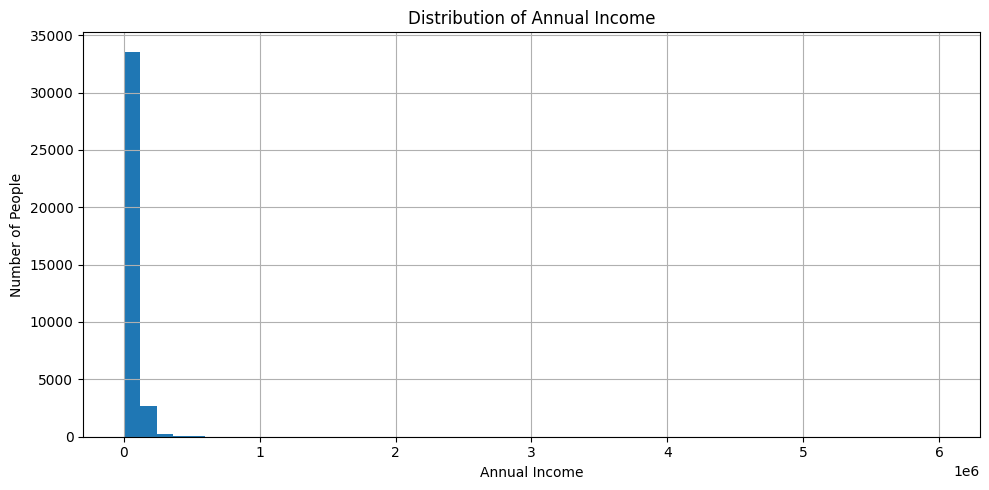

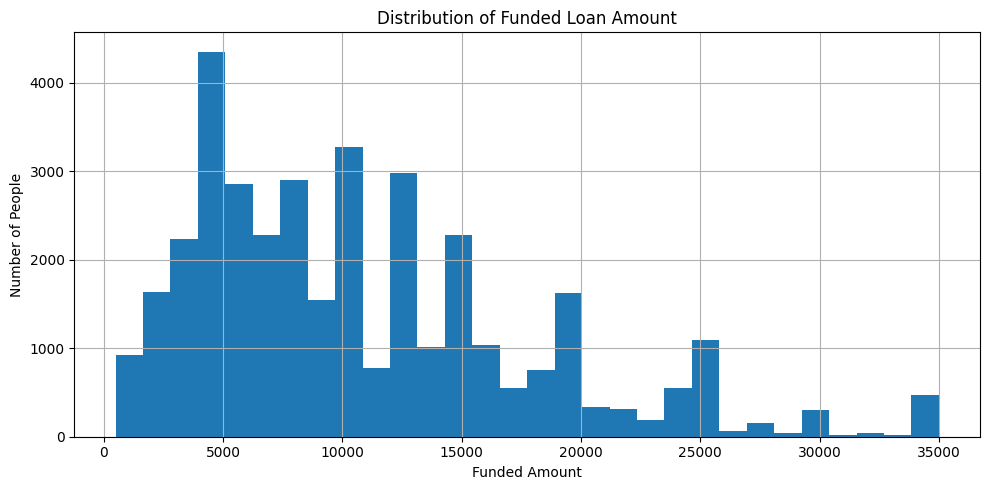

In [9]:
df.head()
#we drop observations that didnt get funding
df = df[df['funded_amnt'] != 0]

print(df.describe())

import matplotlib.pyplot as plt

# Income distribution
plt.figure(figsize=(10, 5))
df['annual_inc'].hist(bins=50)  # You can change the number of bins
plt.title('Distribution of Annual Income')
plt.xlabel('Annual Income')
plt.ylabel('Number of People')
plt.tight_layout()
plt.show()

# Funded amount distribution
plt.figure(figsize=(10, 5))
df['funded_amnt'].hist(bins=30)
plt.title('Distribution of Funded Loan Amount')
plt.xlabel('Funded Amount')
plt.ylabel('Number of People')
plt.tight_layout()
plt.show()



Number of people with annual income > $1,000,000: 13


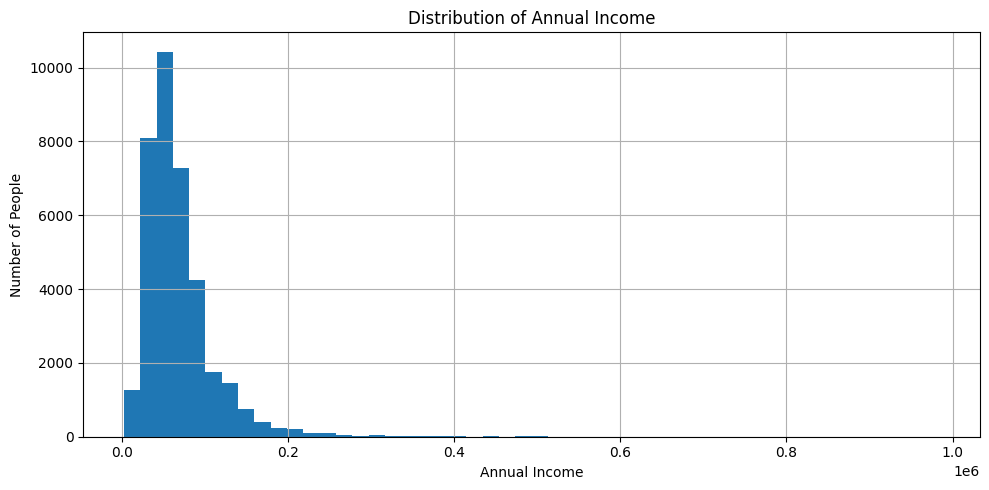

Number of people with annual income > 500 000: 52


In [10]:
#Things are looking realistic but we investigate outliers:
high_income_count = (df['annual_inc'] > 1_000_000).sum()
print("Number of people with annual income > $1,000,000:", high_income_count)

#Drop individuals who make more than 1 million(outliers)
df = df[df['annual_inc'] <= 1_000_000]

# Income distribution
plt.figure(figsize=(10, 5))
df['annual_inc'].hist(bins=50)  # You can change the number of bins
plt.title('Distribution of Annual Income')
plt.xlabel('Annual Income')
plt.ylabel('Number of People')
plt.tight_layout()
plt.show()

high_income_count = (df['annual_inc'] > 500000).sum()
print("Number of people with annual income > 500 000:", high_income_count)



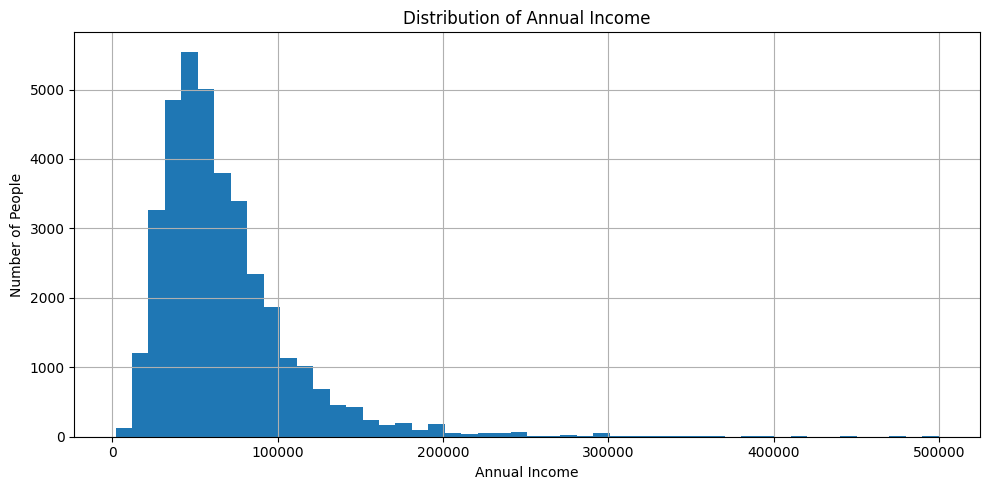

In [11]:
#Go one step further and delete all where income > 500000(still very few)
df = df[df['annual_inc'] <= 500000]
# Income distribution
plt.figure(figsize=(10, 5))
df['annual_inc'].hist(bins=50)  # You can change the number of bins
plt.title('Distribution of Annual Income')
plt.xlabel('Annual Income')
plt.ylabel('Number of People')
plt.tight_layout()
plt.show()

#Finish here for now, potentially could cut more based on income/ could potentially just log transform income

In [12]:
#Now consider the non-numerical variables: emp_length, term, and home ownership
print("Term:")
print(df['term'].value_counts(dropna=False))
print("\nUnique values:", df['term'].unique())

print("\nHome Ownership:")
print(df['home_ownership'].value_counts(dropna=False))
print("\nUnique values:", df['home_ownership'].unique())

print("emp_length")
print(df['emp_length'].value_counts(dropna=False))
print("\nUnique values:", df['emp_length'].unique())




Term:
term
36 months    27798
60 months     8749
Name: count, dtype: int64

Unique values: ['36 months' '60 months']

Home Ownership:
home_ownership
RENT        17527
MORTGAGE    16181
OWN          2711
OTHER         124
NONE            4
Name: count, dtype: int64

Unique values: ['RENT' 'MORTGAGE' 'OWN' 'OTHER' 'NONE']
emp_length
emp_length
10+ years    8124
< 1 year     4508
2 years      4206
3 years      3869
4 years      3235
1 year       3190
5 years      3098
6 years      2099
7 years      1646
8 years      1404
9 years      1168
Name: count, dtype: int64

Unique values: ['4 years' '10+ years' '3 years' '5 years' '7 years' '2 years' '< 1 year'
 '1 year' '6 years' '9 years' '8 years']


In [13]:
print(df.describe())

#Start with converting term to numeric:
df['term'] = df['term'].astype(str)
df['term'] = df['term'].str.extract('(\d+)').astype(int)

#Map employment length to numeric:
mapping = {
    '< 1 year': 0, '1 year': 1, '2 years': 2, '3 years': 3, '4 years': 4,
    '5 years': 5, '6 years': 6, '7 years': 7, '8 years': 8, '9 years': 9,
    '10+ years': 10
}

df['emp_length_dum'] = df['emp_length'].map(mapping)
df = df.drop(columns=['emp_length'])



#Drop observations with other or none as homeownership
print(df.columns)

df = df[~df['home_ownership'].isin(['OTHER', 'NONE'])]


#For the remaining Mortgage/ Own/ Rent we use dummies. Rent will be the baseline so we add to dummy variables for Mortgage and Rent.

home_dummies = pd.get_dummies(df['home_ownership'], prefix='home')

# Drop 'home_RENT' to use it as the baseline
home_dummies = home_dummies.drop(columns=['home_RENT'])

# Concatenate with df and drop original column
df = pd.concat([df.drop(columns=['home_ownership']), home_dummies], axis=1)

df.head()





        funded_amnt      int_rate   installment     annual_inc           dti  \
count  36547.000000  36547.000000  36547.000000   36547.000000  36547.000000   
mean   10741.944619     12.123184    323.000587   67894.644547     13.365026   
std     7051.824746      3.674768    208.720556   42379.930434      6.711019   
min      500.000000      5.420000     15.670000    1896.000000      0.000000   
25%     5075.000000      9.620000    166.050000   40800.000000      8.200000   
50%     9500.000000     11.990000    277.530000   59004.000000     13.470000   
75%    15000.000000     14.650000    427.180000   82500.000000     18.650000   
max    35000.000000     24.110000   1305.190000  500000.000000     29.990000   

        delinq_2yrs  inq_last_6mths       pub_rec     total_acc    repay_fail  
count  36547.000000    36547.000000  36547.000000  36547.000000  36547.000000  
mean       0.152954        1.092894      0.056694     22.086382      0.152461  
std        0.510466        1.548285    

,funded_amnt,term,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,pub_rec,total_acc,repay_fail,emp_length_dum,home_MORTGAGE,home_OWN
1,2500.0,36,13.98,85.42,20004.0,19.86,0.0,5.0,0.0,10.0,0,4,False,False
2,5000.0,36,15.95,175.67,59000.0,19.57,0.0,1.0,0.0,15.0,1,4,False,False
3,7000.0,36,9.91,225.58,53796.0,10.80,3.0,3.0,0.0,20.0,0,10,True,False
4,2000.0,36,5.42,60.32,30000.0,3.60,0.0,0.0,0.0,15.0,0,10,False,False
7,6000.0,36,7.49,186.61,35000.0,13.13,0.0,0.0,0.0,9.0,0,3,False,False


In [14]:
df.info()
df.describe()
#Should be ready to use

<class 'pandas.core.frame.DataFrame'>
Index: 36419 entries, 1 to 38479
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   funded_amnt     36419 non-null  float64
 1   term            36419 non-null  int64  
 2   int_rate        36419 non-null  float64
 3   installment     36419 non-null  float64
 4   annual_inc      36419 non-null  float64
 5   dti             36419 non-null  float64
 6   delinq_2yrs     36419 non-null  float64
 7   inq_last_6mths  36419 non-null  float64
 8   pub_rec         36419 non-null  float64
 9   total_acc       36419 non-null  float64
 10  repay_fail      36419 non-null  int64  
 11  emp_length_dum  36419 non-null  int64  
 12  home_MORTGAGE   36419 non-null  bool   
 13  home_OWN        36419 non-null  bool   
dtypes: bool(2), float64(9), int64(3)
memory usage: 3.7 MB


,funded_amnt,term,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,pub_rec,total_acc,repay_fail,emp_length_dum
count,36419.000000,36419.000000,36419.000000,36419.000000,36419.000000,36419.000000,36419.000000,36419.000000,36419.000000,36419.000000,36419.000000,36419.000000
mean,10747.360581,41.764903,12.120797,323.047103,67911.484837,13.368177,0.152366,1.090337,0.056701,22.092864,0.152173,4.895000
std,7055.208598,10.253119,3.676785,208.755185,42397.655847,6.712261,0.509548,1.546103,0.243309,11.591596,0.359194,3.558524
min,500.000000,36.000000,5.420000,15.670000,1896.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,5100.000000,36.000000,9.620000,166.265000,40800.000000,8.200000,0.000000,0.000000,0.000000,13.000000,0.000000,2.000000
50%,9500.000000,36.000000,11.990000,277.570000,59004.000000,13.470000,0.000000,1.000000,0.000000,20.000000,0.000000,4.000000
75%,15000.000000,36.000000,14.650000,427.180000,82500.000000,18.650000,0.000000,2.000000,0.000000,29.000000,0.000000,9.000000
max,35000.000000,60.000000,24.110000,1305.190000,500000.000000,29.990000,11.000000,33.000000,5.000000,90.000000,1.000000,10.000000


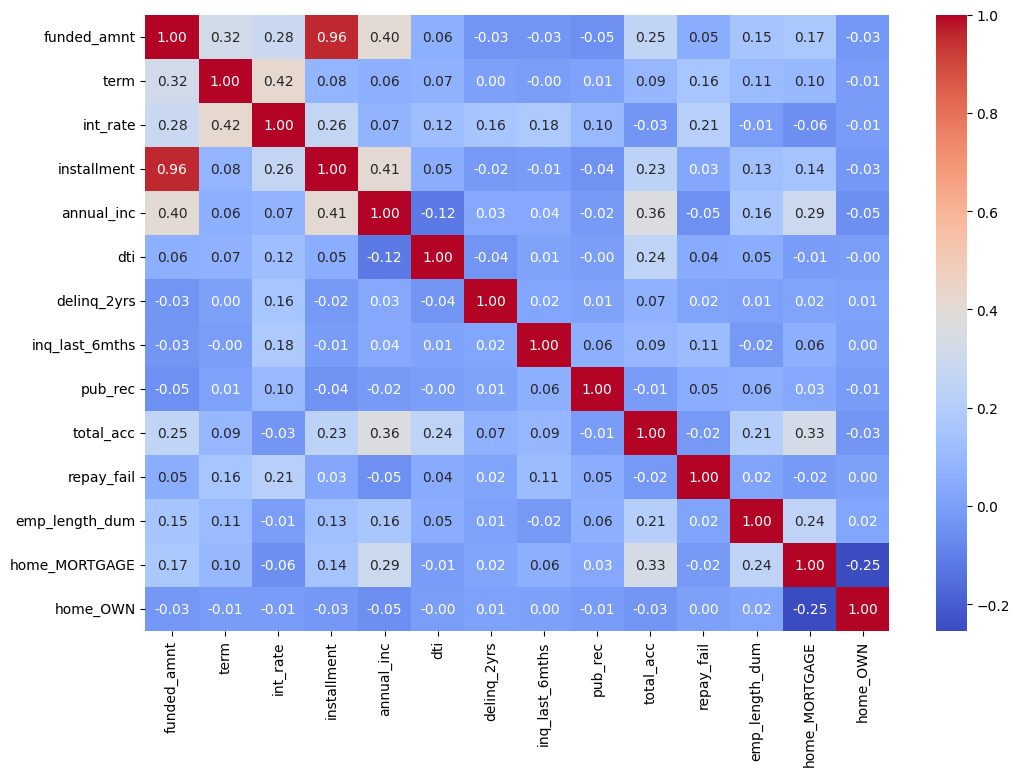

In [15]:
#Get some graphs(you can definintely make it nicer)
import seaborn as sns

#heatmap
corr = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.show()


In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

#Get train and test splits:
X = df.drop(columns=['repay_fail'])
y = df['repay_fail']

# Split into training and test sets
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shapes:", train_X.shape, test_X.shape, train_y.shape, test_y.shape )

Shapes: (29135, 13) (7284, 13) (29135,) (7284,)


**Logistic Regression**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Normalize the data
scaler = StandardScaler()
train_Xb = scaler.fit_transform(train_X)
test_Xb = scaler.transform(test_X)

# Train Logistic Regression
modelLR = LogisticRegression(max_iter=500)
modelLR.fit(train_Xb, train_y)

# Evaluate model
train_score = modelLR.score(train_Xb, train_y)
test_score = modelLR.score(test_Xb, test_y)

print("Training score:", train_score)
print("Testing score:", test_score)

#some extra: we have a very imbalanced dataset so accuracy is not a good metric
y_pred = modelLR.predict(test_Xb)
print("\nConfusion Matrix:")
print(confusion_matrix(test_y, y_pred))

print("\nClassification Report:")
print(classification_report(test_y, y_pred, digits=4))


Training score: 0.8477775870945599
Testing score: 0.8448654585392641

Confusion Matrix:
[[6146   12]
 [1118    8]]

Classification Report:
              precision    recall  f1-score   support

           0     0.8461    0.9981    0.9158      6158
           1     0.4000    0.0071    0.0140      1126

    accuracy                         0.8449      7284
   macro avg     0.6230    0.5026    0.4649      7284
weighted avg     0.7771    0.8449    0.7764      7284



**Logistic regression (fiddling with c)**
* where if the estimated probability > c
* then we classify as a 1
* and otherwise 0

=== Default Threshold (0.5) ===
Training score: 0.8477775870945599
Testing score: 0.8448654585392641
Confusion Matrix:
[[6146   12]
 [1118    8]]

Classification Report:
              precision    recall  f1-score   support

           0     0.8461    0.9981    0.9158      6158
           1     0.4000    0.0071    0.0140      1126

    accuracy                         0.8449      7284
   macro avg     0.6230    0.5026    0.4649      7284
weighted avg     0.7771    0.8449    0.7764      7284


=== Custom Thresholds ===

--- Threshold: 0.15 ---
[[3993 2165]
 [ 428  698]]
              precision    recall  f1-score   support

           0     0.9032    0.6484    0.7549      6158
           1     0.2438    0.6199    0.3500      1126

    accuracy                         0.6440      7284
   macro avg     0.5735    0.6342    0.5524      7284
weighted avg     0.8013    0.6440    0.6923      7284


--- Threshold: 0.2 ---
[[5001 1157]
 [ 654  472]]
              precision    recall  f1-score   

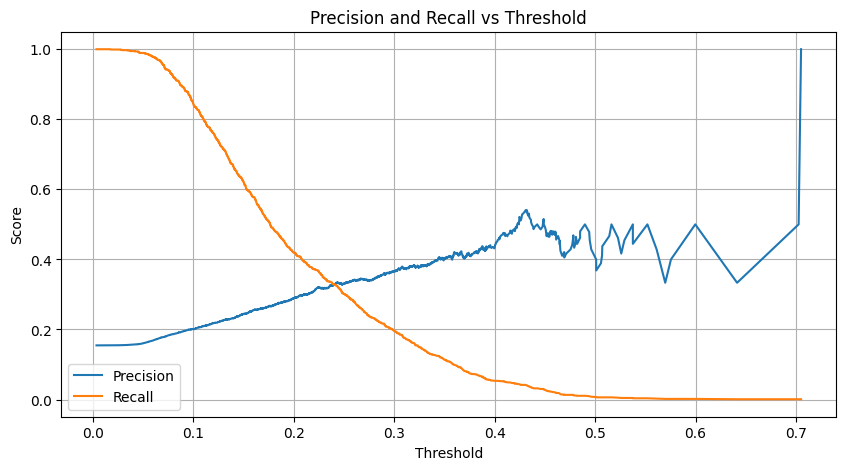


=== Best Threshold for F1 ===
Threshold: 0.1602, F1-score: 0.3541
[[4263 1895]
 [ 476  650]]
              precision    recall  f1-score   support

           0     0.8996    0.6923    0.7824      6158
           1     0.2554    0.5773    0.3541      1126

    accuracy                         0.6745      7284
   macro avg     0.5775    0.6348    0.5683      7284
weighted avg     0.8000    0.6745    0.7162      7284



In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    precision_recall_curve,
    f1_score,
)

# Normalize the data
scaler = StandardScaler()
train_Xb = scaler.fit_transform(train_X)
test_Xb = scaler.transform(test_X)

# Train the logistic regression model
model = LogisticRegression()
model.fit(train_Xb, train_y)

# Default evaluation
print("=== Default Threshold (0.5) ===")
print("Training score:", model.score(train_Xb, train_y))
print("Testing score:", model.score(test_Xb, test_y))

y_pred_default = model.predict(test_Xb)
print("Confusion Matrix:")
print(confusion_matrix(test_y, y_pred_default))
print("\nClassification Report:")
print(classification_report(test_y, y_pred_default, digits=4))

# Predict probabilities
y_pred_proba = model.predict_proba(test_Xb)[:, 1]

# Try multiple thresholds
print("\n=== Custom Thresholds ===")
for c in [0.15, 0.2, 0.25, 0.3, 0.4, 0.5]:
    y_pred_custom = (y_pred_proba > c).astype(int)
    print(f"\n--- Threshold: {c} ---")
    print(confusion_matrix(test_y, y_pred_custom))
    print(classification_report(test_y, y_pred_custom, digits=4))

# Plot precision & recall vs threshold
prec, rec, thresholds = precision_recall_curve(test_y, y_pred_proba)
plt.figure(figsize=(10, 5))
plt.plot(thresholds, prec[:-1], label="Precision")
plt.plot(thresholds, rec[:-1], label="Recall")
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.title("Precision and Recall vs Threshold")
plt.legend()
plt.grid()
plt.show()

# Find threshold that maximizes F1-score
best_f1 = 0
best_c = 0
for c in np.linspace(0.05, 0.5, 50):
    y_pred = (y_pred_proba > c).astype(int)
    f1 = f1_score(test_y, y_pred)
    if f1 > best_f1:
        best_f1 = f1
        best_c = c

print(f"\n=== Best Threshold for F1 ===")
print(f"Threshold: {best_c:.4f}, F1-score: {best_f1:.4f}")

# Final evaluation with best threshold
y_pred_best = (y_pred_proba > best_c).astype(int)
print(confusion_matrix(test_y, y_pred_best))
print(classification_report(test_y, y_pred_best, digits=4))

### ***Random Forests***

In [ ]:
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score

XtestT = test_X
XtrainT = train_X
ytestT = test_y
ytrainT = train_y

#Perform grid search for best depth and size, we consider class weiht due to how imbalanced the dataset is:

param_grid = {
    'n_estimators': [100, 150, 200],
    'max_depth': [5, 10, 15, None],
    'class_weight': ['balanced', {0: 1, 1: 3}, {0:1,1:5}]
}

param_grid2 = {
    'n_estimators': [10,20,30],
    'max_depth': [5, 10],
    'class_weight': ['balanced', {0: 1, 1: 3}, {0: 1,1: 5}]
}


optimal_params_rf = GridSearchCV(
    estimator=RFC(random_state=42),
    param_grid=param_grid,
    cv=5,
    scoring='f1',
    n_jobs=-1,
    verbose=3
)
print("Starting grid search...")
optimal_params_rf.fit(XtrainT, ytrainT)

best_rf = optimal_params_rf.best_estimator_

# Evaluate on training set
y_train_pred = best_rf.predict(XtrainT)

print("\nTraining Set Evaluation:")
print("Training Accuracy:", accuracy_score(ytrainT, y_train_pred))
print("Training Confusion Matrix:")
print(confusion_matrix(ytrainT, y_train_pred))
print("Training Classification Report:")
print(classification_report(ytrainT, y_train_pred, digits=4))

# Evaluate on test set
y_pred = best_rf.predict(XtestT)

print("\nTest Set Evaluation:")
print("Accuracy:", accuracy_score(ytestT, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(ytestT, y_pred))
print("\nClassification Report:")
print(classification_report(ytestT, y_pred, digits=4))



Starting grid search...
Fitting 5 folds for each of 36 candidates, totalling 180 fits


KeyboardInterrupt: 

In [ ]:
# Evaluate on training set
y_train_pred = best_rf.predict(XtrainT)

print("\nTraining Set Evaluation:")
print("Training Accuracy:", accuracy_score(ytrainT, y_train_pred))
print("Training Confusion Matrix:")
print(confusion_matrix(ytrainT, y_train_pred))
print("Training Classification Report:")
print(classification_report(ytrainT, y_train_pred, digits=4))



Training Set Evaluation:
Training Accuracy: 0.6480864939076711
Training Confusion Matrix:
[[15936  8783]
 [ 1470  2946]]
Training Classification Report:
              precision    recall  f1-score   support

           0     0.9155    0.6447    0.7566     24719
           1     0.2512    0.6671    0.3649      4416

    accuracy                         0.6481     29135
   macro avg     0.5834    0.6559    0.5608     29135
weighted avg     0.8148    0.6481    0.6972     29135



# SVM's

In [ ]:
! python -m pip install scikit-learn-intelex
from sklearnex import patch_sklearn
patch_sklearn("SVC")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 62.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.1/112.1 MB 8.8 MB/s eta 0:00:00


Intel(R) Extension for Scikit-learn* enabled (https://github.com/uxlfoundation/scikit-learn-intelex)


In [ ]:
from sklearn.svm import SVC

scaler = StandardScaler()
train_X_scaled = scaler.fit_transform(train_X)
test_X_scaled = scaler.transform(test_X)

# according ro the grid search, the best parameters for recall are:
# {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
modelSVC = SVC(kernel="rbf", C=10, gamma=0.01, class_weight="balanced")
modelSVC = modelSVC.fit(train_X_scaled, train_y)

#testing the model
from sklearn.metrics import accuracy_score, classification_report

SVMpredictions = modelSVC.predict(test_X_scaled)

print(classification_report(test_y, SVMpredictions))

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.90      0.65      0.76      6158
           1       0.24      0.61      0.35      1126

    accuracy                           0.64      7284
   macro avg       0.57      0.63      0.55      7284
weighted avg       0.80      0.64      0.69      7284



In [ ]:
#grid search

from sklearn.model_selection import GridSearchCV

param_grid = {'C': [10, 20], 'gamma': ['scale', 'auto', 0.01,], 'kernel': ['rbf'],
              'class_weight': [None, 'balanced', {0:1, 1:2}, {0:1, 1:5}, {0:1, 1:10}]}
grid_search = GridSearchCV(SVC(), param_grid, cv=5, scoring='recall')
grid_search.fit(train_X, train_y)

print(f'Best parameters: {grid_search.best_params_}')

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

Best parameters: {'C': 10, 'class_weight': {0: 1, 1: 10}, 'gamma': 'scale', 'kernel': 'rbf'}
